# Default Loan Prediction
## Final Project 
## By Nicolas Obregon

## Introduction and Research Topic

### Research Question

### Motivation




## Data overview, cleaning and pre-processing

The dataset was collected from kaggle (https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior/version/1?select=Training+Data.csv), a webpage that contains multiple datasets for users to solve problems or create novel coding projects.

It consists of one csv files:

*   The first **(TrainingData.csv)**, used here, is the training data file which has users with 12 features describing them, and a risk flag (which is either 1 (person defaulted) or 0 (person did not default)) which indicates if the individual has defaulted in the past or not. Our machine learning model will mainly learn from the contents of this folder.
  * Most of the variables are object types so I will convert them immediatly to category types


### Variables
There are 13 variables, here they are explained in detail:
* Variables that are important to know to keep track of what is going on, but otherwise have no effect on the analysis:
  * **Id**: Self-explanatory
  * **Income**: States in Indian rupees the individuals income
  * **Age**: States the users age
  * **Experience**: States the users years of work experience 
  * **Relationship_Status**: States if the user is married or single
  * **House_Ownership**: States if the user rents or owns a house or neither
  * **Car_Ownership**: States if the user owns a car
  * **Profession**: The proffesion of the user 
  * **CITY and STATE**: Self-explanatory
  * **CURRENT_JOB_YRS**: The years the user has been at their current job
  * **CURRENT_HOUSE_YRS**: Years user has been in their house
  * **Risk_Flag**: Whether the user has defaulted or not.
    * This is the Class Variable (0 or 1)

### Libraries


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


#Import to split training and test data
from sklearn.model_selection import train_test_split

### Data Type Cleaning

Before I start doing the project I want to have the correct data.

I can see below that many variables are object types.

In [2]:
df = pd.read_csv("TrainingData.csv", index_col = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [3]:
dfOriginal=df.copy()

I will immediatly change the object type variables to category.

In [4]:
df = pd.read_csv("TrainingData.csv", index_col = 0
                 #, dtype={'Risk_Flag': 'category'}
                 )

df = df.rename(columns = {'Married/Single':'Relationship_Status'})

### Encoding

In [5]:
#Encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_columns = [df.Relationship_Status, df.House_Ownership, df.Car_Ownership,
              df.Profession, df.STATE, df.CITY]
for i in df_columns:
    i = le.fit_transform(i)

df.Relationship_Status = le.fit_transform(df.Relationship_Status)
df.House_Ownership = le.fit_transform(df.House_Ownership)
df.Car_Ownership = le.fit_transform(df.Car_Ownership)
df.Profession = le.fit_transform(df.Profession)
df.STATE = le.fit_transform(df.STATE)
df.CITY = le.fit_transform(df.CITY)

print('the set has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

df

the set has 252000 rows and 12 columns


,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,1,2,0,33,251,13,3,13,0
2,7574516,40,10,1,2,0,43,227,14,9,13,0
3,3991815,66,4,0,2,0,47,8,12,4,10,0
4,6256451,41,2,1,2,1,43,54,17,2,12,1
5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251998,4522448,46,7,1,2,0,17,144,14,7,12,0


As well as the **Married/Single** variable as it is annoying to write

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Income               252000 non-null  int64
 1   Age                  252000 non-null  int64
 2   Experience           252000 non-null  int64
 3   Relationship_Status  252000 non-null  int64
 4   House_Ownership      252000 non-null  int64
 5   Car_Ownership        252000 non-null  int64
 6   Profession           252000 non-null  int64
 7   CITY                 252000 non-null  int64
 8   STATE                252000 non-null  int64
 9   CURRENT_JOB_YRS      252000 non-null  int64
 10  CURRENT_HOUSE_YRS    252000 non-null  int64
 11  Risk_Flag            252000 non-null  int64
dtypes: int64(12)
memory usage: 25.0 MB


It is working fine, I can move on.

### Missing Values

I can see below that there are no missing values

In [7]:
na_values = df.isna().sum()

na_values

Income                 0
Age                    0
Experience             0
Relationship_Status    0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Risk_Flag              0
dtype: int64

Sometimes for some reason one or two values are shown as missing so I will have this code below to fix that. As it is only 1 or 2 values, replacing them with the median or similar can be redundant, we can simply drop the row where they are

In [8]:
df = df.dropna()
na_values = df.isna().sum()
na_values

Income                 0
Age                    0
Experience             0
Relationship_Status    0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Risk_Flag              0
dtype: int64

### Describe Numericals

Using the describe() function, I can see some important things:

*  The risk flag mean is 0.12, meaning that **most individuals have not defaulted**. 

* Income mean is quite high, and the max is so as well, but the min is extremely low (10310 Indian Rupees are 140 USD approximately) 
  * **This could be an outlier, I will consider this later**

* Age is appropriately dispersed

* All variables have the same count, so there are no missing values

In [9]:
df.describe()

,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


### Irregularities

As seen before, there were possible outliers in the income section, the max was extremely high and the min was extremely low. 

Let's visualize this

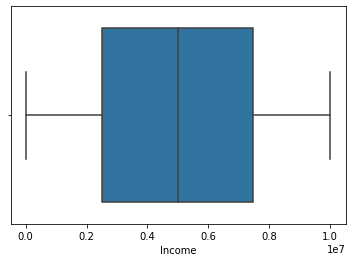

In [10]:
# I can make a boxplot with the income variable and see that there are quite a lot of outliers, and the same with the minimum_nights variable

plot1 = plt.figure(1)
bp_price = sns.boxplot( x=df['Income'] )

plt.show()

### Outliers 'fixed'
Seeing it as a box plot makes it much more clear that there are no outliers, we can therefore move on.

### Basic visual analysis 

Here I will visualize some variables which I think are important

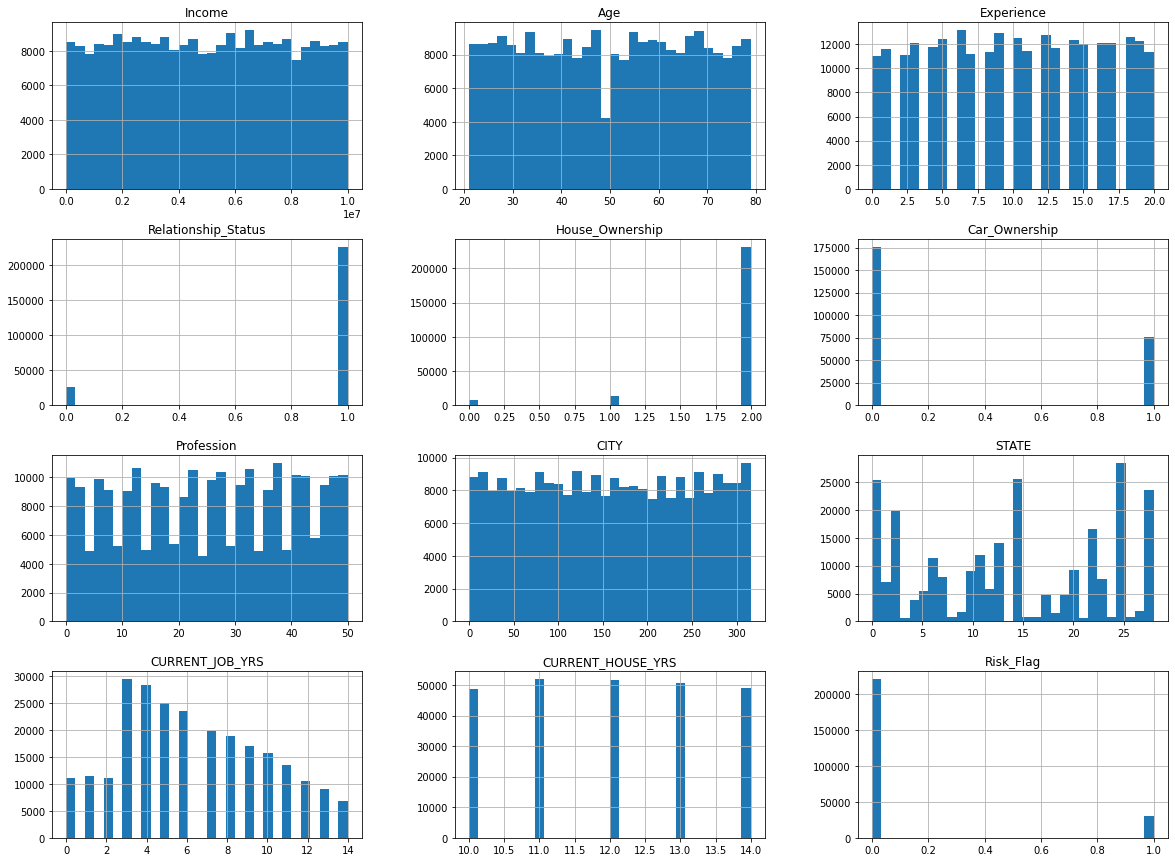

In [11]:
#check variable distributions
df.hist(bins=30, figsize=(20,15))
plt.show()

### Correlation

Now that the data is perfectly clean, I will use all three **corr()** methods  '**pearson, kendall and spearman**' to see if there are any correlations with the variables. They all indicate a correlation between two variables with a number from -1 to 1 [1].
* -1 means negative correlation
* 0 means no correlation
* 1 means a total positive correlation

As it is encoded, the categorical values can appear in the chart.



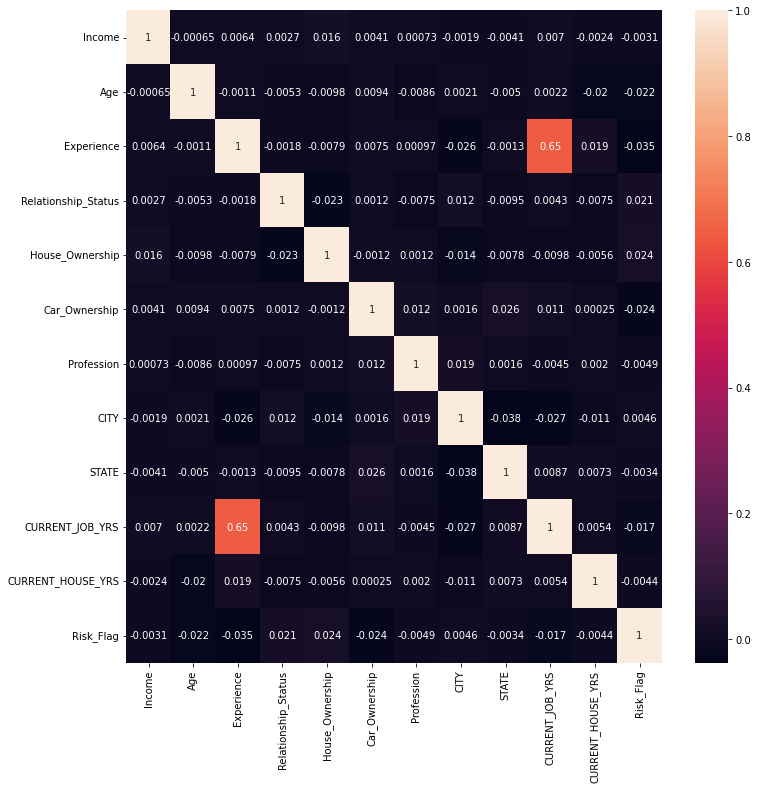

In [12]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can conclude that there is no significant correlation in any of the three cases

### Rescaling of Data

I will now rescale the data so any values that can differ greatly between the variables will not afect the model.

StandardScaler is used for transforming data so it has 0 as mean (μ = 0) and 1 as std (σ = 1). This is ideal when we have negative values in our dataframe [2].

In [13]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.drop('Risk_Flag',axis=1))

i = 0
for col in df.columns[:-1]:
    df[col] = scaled[:,i]
    i += 1

df

,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0
2,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0
3,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0
4,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1
5,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0
251997,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0
251998,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0


### Stratification

Splitting the dataset is done randomly, this means that in some occasions it is possible to have 1 class label appear much more than the other class label in the training data. 

This can affect the classification models, making us have more accurate predictions for one class but not for the other (classes are default/no default, or 0, 1). Therefore, we stratify data, which makes the split proportionate

### Imbalanced Data / Undersampling



0    221004
1     30996
Name: Risk_Flag, dtype: int64

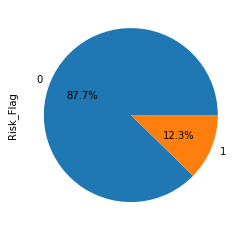

In [14]:
df['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.1f%%")
df['Risk_Flag'].value_counts()


In [15]:
df['Risk_Flag'].shape

(252000,)

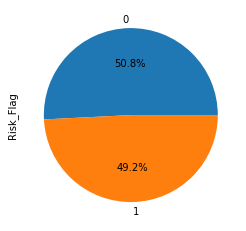

In [16]:
# We have much more instances of the input variable 0 occuring than the 1. This causes 
# issues with imbalancing and can make our models be highly inefficient especially
# when we receive the precision and recall scores

# We currently have 221004 instances of class 0 and 30996 instances of class 1. 
# Therefore we want to do undersampling so the class 0 also has a similar amount to that
# of class 1. 

class0 = df[df['Risk_Flag'] == 0].sample(32000)

class1 = df[df['Risk_Flag'] == 1]

df = pd.concat([class0, class1], axis = 0)

df['Risk_Flag'].value_counts().plot(kind = 'pie', autopct = "%.1f%%")
plt.show()

### Training, Testing and Validation Samples

Now that I am done with the data preprocessing, I must split the data before I start doing the classifiers.

**X** will be the dataset without the Risk_Flag column, and **y** will be the Risk_Flag column

[4].



In [17]:
X = df.drop(['Risk_Flag'], axis = 'columns')
Y = df.Risk_Flag

Before, if we did not do undersampling to help with the imbalanced dataset, we would have had around 25,0000 values, but since we have seriously undersampled it now, we will have less values, around 93,000.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 42, stratify = Y)


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (50396, 11)
X_test shape: (12600, 11)
Y_train shape: (50396,)
Y_test shape: (12600,)


We can see that it is all good now

In [ ]:
Y = pd.DataFrame(Y)
Y.head()

,Risk_Flag
Id,
219356,0
69365,0
16288,0
156727,0
8003,0


## Model Creation
## Decision Tree Implementation

Now I will implement the **Decision Tree Classifier**.

As seen in the scikit-learn documentation (referenced below), it takes 2 arrays as inputs (**training and test sample**)

The code below will fit the model

[7].

A decision tree makes a prediction. 

### Decision Tree Hyperparameters
* The parameter **max_depth** is a hyperparameter that defines the depth of the tree. I will use it as otherwise the tree will have a depth of thousands of nodes.

* The parameter **criterion** can be set to either entropy or gini. It determines how the impurity is measured.
 [8].

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


DTreeClf = tree.DecisionTreeClassifier(criterion = 'entropy')
DTreeClf = DTreeClf.fit(X.values, Y.values)
predsdtc = DTreeClf.predict(X_test)
print("accuracy_score: " + str(accuracy_score(Y_test, predsdtc)))
print("precision_score: " + str(precision_score(Y_test, predsdtc)))
print("recall_score: " + str(recall_score(Y_test, predsdtc)))
print("f1: " + str(f1_score(Y_test, predsdtc)))

accuracy_score: 0.9554761904761905
precision_score: 0.9171475070276668
recall_score: 0.9998387096774194
f1: 0.9567096226560691


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Following the example code from the documentation, I can plot the already trained tree:

Having said that, unless I change the max_depth value, it can take an abnormal amount of time so as of now the code will remain commented out
[7]. 


In [ ]:
#plt.figure(figsize=(10,5))
#tree.plot_tree(DTreeClf)

### Hyperparameter Optimization

Using grid search, we can do some basic hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
 
parameter_grid = [
     {'criterion':['gini','entropy'],
      'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
 
grid_search = GridSearchCV(DTreeClf, parameter_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
 
grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'criterion': 'gini', 'max_depth': 50}
best estimator DecisionTreeClassifier(max_depth=50)


In [ ]:
best_DTreeClf=grid_search.best_estimator_
pred_Y=best_DTreeClf.predict(X_test)

print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


 accuracy 0.8629365079365079

 precision 0.8470131885182312

 recall (sensitivity) 0.8804838709677419

 f1 0.8634242783708975


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


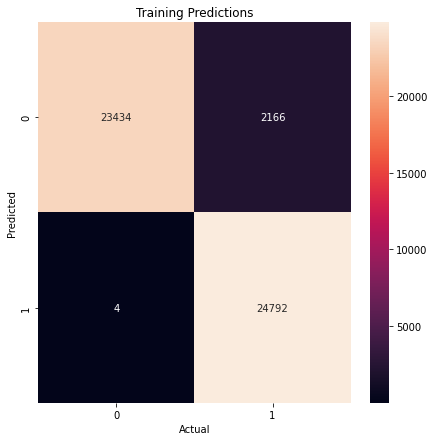

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     25600
           1       0.92      1.00      0.96     24796

    accuracy                           0.96     50396
   macro avg       0.96      0.96      0.96     50396
weighted avg       0.96      0.96      0.96     50396



In [ ]:
def predict(DTreeClf, X):
    pred = DTreeClf.predict(X).flatten()
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
    
    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()
y_train_pred = predict(DTreeClf, X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Training Predictions')

from sklearn.metrics import classification_report
print(classification_report(Y_train, y_train_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


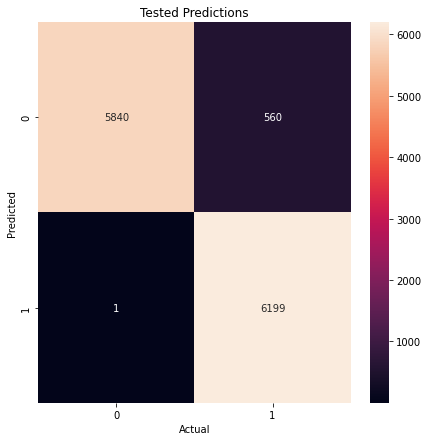

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      6400
           1       0.92      1.00      0.96      6200

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
y_test_pred = predict(DTreeClf, X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Tested Predictions')
print(classification_report(Y_test, y_test_pred))


 ROC AUC Score 0.8632106854838709


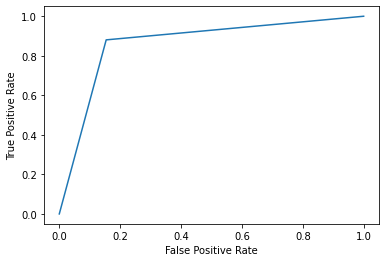

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve

print('\n ROC AUC Score', roc_auc_score(Y_test, pred_Y))

fpr, tpr, _ = metrics.roc_curve(Y_test, pred_Y)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

Random Forests are a type of ensemble models, which means they construct a s et of base models, and combine the predictions of multiple models to reach a better one.

Random Forests specifically work by having a vast amount of uncorrelated individual decision trees. This randomness means trees are less correlated, so we can see on a wider spectrum our data and will help us reach a better prediction.

The more views we have, the more we can know what option is best to choose.

The most important hyperparameters are 
* max_features


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForestClf=RandomForestClassifier()

rForestClf = rForestClf.fit(X.values, Y.values)
predsdtc = rForestClf.predict(X_test)
print("accuracy_score: " + str(accuracy_score(Y_test, predsdtc)))
print("precision_score: " + str(precision_score(Y_test, predsdtc)))
print("recall_score: " + str(recall_score(Y_test, predsdtc)))
print("f1: " + str(f1_score(Y_test, predsdtc)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


accuracy_score: 0.9554761904761905
precision_score: 0.9171475070276668
recall_score: 0.9998387096774194
f1: 0.9567096226560691


### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
 
param_grid = { 
    'max_features': [2, 3, 4, 6],
    'criterion' :['gini', 'entropy']}
 
grid_search = GridSearchCV(rForestClf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   
 
grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'criterion': 'gini', 'max_features': 6}
best estimator RandomForestClassifier(max_features=6)
0.845602817109911 {'criterion': 'gini', 'max_features': 2}
0.8458607477121218 {'criterion': 'gini', 'max_features': 3}
0.8459401029486108 {'criterion': 'gini', 'max_features': 4}
0.8464560074616875 {'criterion': 'gini', 'max_features': 6}
0.8451067282751973 {'criterion': 'entropy', 'max_features': 2}
0.8454837261822081 {'criterion': 'entropy', 'max_features': 3}
0.8453250038977789 {'criterion': 'entropy', 'max_features': 4}
0.8459004085974767 {'criterion': 'entropy', 'max_features': 6}


In [ ]:
best_rForestClf=grid_search.best_estimator_
pred_Y=best_rForestClf.predict(X_test)

print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


 accuracy 0.8488888888888889

 precision 0.8700895933838731

 recall (sensitivity) 0.8145161290322581

 f1 0.8413862045984671


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


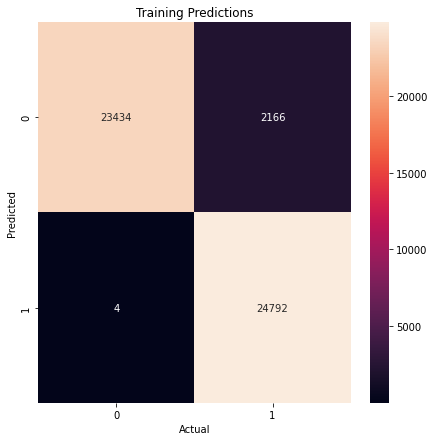

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     25600
           1       0.92      1.00      0.96     24796

    accuracy                           0.96     50396
   macro avg       0.96      0.96      0.96     50396
weighted avg       0.96      0.96      0.96     50396



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


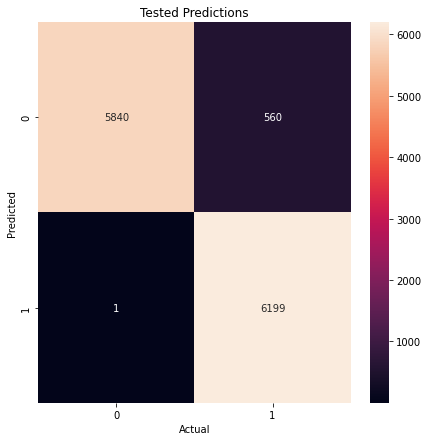

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      6400
           1       0.92      1.00      0.96      6200

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
def predict(rForestClf, X):
    pred = rForestClf.predict(X).flatten()
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
    
    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()
y_train_pred = predict(rForestClf, X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Training Predictions')

from sklearn.metrics import classification_report
print(classification_report(Y_train, y_train_pred))

y_test_pred = predict(rForestClf, X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Tested Predictions')
print(classification_report(Y_test, y_test_pred))


 ROC AUC Score 0.8483518145161291


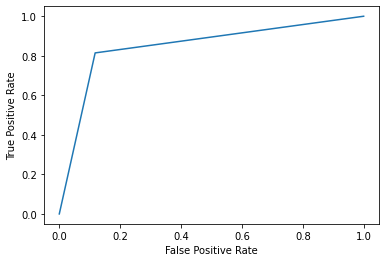

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve

print('\n ROC AUC Score', roc_auc_score(Y_test, pred_Y))

fpr, tpr, _ = metrics.roc_curve(Y_test, pred_Y)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Feature Importance

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

### AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABoostClf = AdaBoostClassifier()
ABoostClf.fit(X, Y)
y_pred = ABoostClf.predict(X_train)
accuracy = ABoostClf.score(X_train, Y_train)
accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5647868878482419

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     #'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.1, 1]
 }
grid_search = GridSearchCV(ABoostClf, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'learning_rate': 1}
best estimator AdaBoostClassifier(learning_rate=1)
0.5338718607130651 {'learning_rate': 0.01}
0.5454997228246062 {'learning_rate': 0.1}
0.5566511798852556 {'learning_rate': 1}


In [ ]:

best_ABoostGrid=grid_search.best_estimator_
pred_Y=best_ABoostGrid.predict(X_test)
 
cm=confusion_matrix(Y_test, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[3886 2514]
 [3023 3177]]

 accuracy 0.5605555555555556

 precision 0.5582498682129678

 recall (sensitivity) 0.5124193548387097

 f1 0.5343537128921033


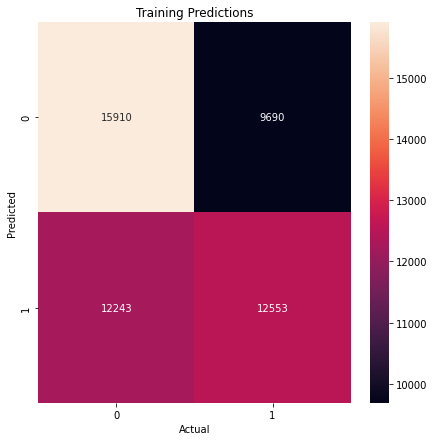

              precision    recall  f1-score   support

           0       0.57      0.62      0.59     25600
           1       0.56      0.51      0.53     24796

    accuracy                           0.56     50396
   macro avg       0.56      0.56      0.56     50396
weighted avg       0.56      0.56      0.56     50396



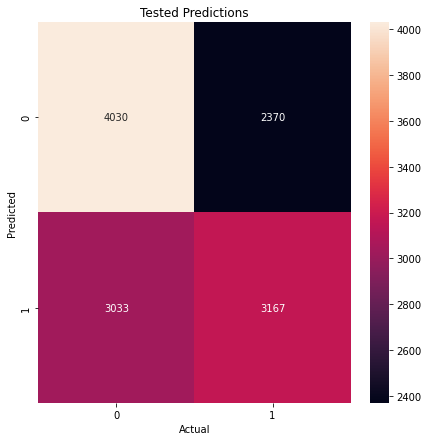

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      6400
           1       0.57      0.51      0.54      6200

    accuracy                           0.57     12600
   macro avg       0.57      0.57      0.57     12600
weighted avg       0.57      0.57      0.57     12600



In [ ]:
def predict(ABoostClf, X):
    pred = ABoostClf.predict(X).flatten()
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
    
    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()
y_train_pred = predict(ABoostClf, X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Training Predictions')

from sklearn.metrics import classification_report
print(classification_report(Y_train, y_train_pred))

y_test_pred = predict(ABoostClf, X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Tested Predictions')
print(classification_report(Y_test, y_test_pred))


 ROC AUC Score 0.5598034274193548


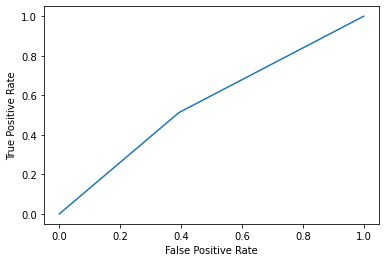

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve

print('\n ROC AUC Score', roc_auc_score(Y_test, pred_Y))

fpr, tpr, _ = metrics.roc_curve(Y_test, pred_Y)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC

SVCClf = SVC()
SVCClf.fit(X, Y)
y_pred = SVCClf.predict(X_train)
accuracy = SVCClf.score(X_train, Y_train)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6279665052781966

### Hyperparameter Organization

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear']
              }
grid_search = GridSearchCV(SVCClf, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best parameter values {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best estimator SVC(C=1, gamma=1, kernel='linear')
0.5345860834329432 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.5345860834329432 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.5345860834329432 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.5348242042625165 {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.5348242042625165 {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.5348242042625165 {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.5347051428634424 {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.5347051428634424 {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
0.5347051428634424 {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
best_SVCClf = grid_search.best_estimator_
pred_Y = best_SVCClf.predict(X_test)
 
cm=confusion_matrix(Y_test, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))

confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[3267 3133]
 [2742 3458]]

 accuracy 0.5337301587301587

 precision 0.52465483234714

 recall (sensitivity) 0.557741935483871

 f1 0.5406926745367837


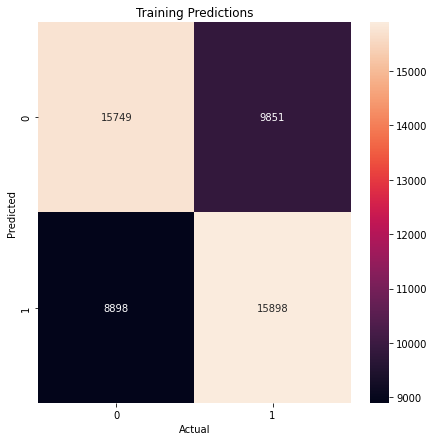

              precision    recall  f1-score   support

           0       0.64      0.62      0.63     25600
           1       0.62      0.64      0.63     24796

    accuracy                           0.63     50396
   macro avg       0.63      0.63      0.63     50396
weighted avg       0.63      0.63      0.63     50396



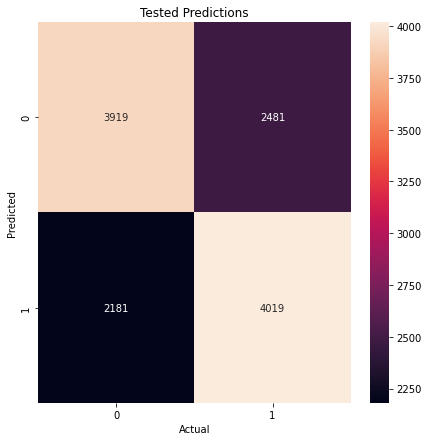

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      6400
           1       0.62      0.65      0.63      6200

    accuracy                           0.63     12600
   macro avg       0.63      0.63      0.63     12600
weighted avg       0.63      0.63      0.63     12600



In [ ]:
def predict(SVCClf, X):
    pred = SVCClf.predict(X).flatten()
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
    
    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()
y_train_pred = predict(SVCClf, X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Training Predictions')

from sklearn.metrics import classification_report
print(classification_report(Y_train, y_train_pred))

y_test_pred = predict(SVCClf, X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Tested Predictions')
print(classification_report(Y_test, y_test_pred))


 ROC AUC Score 0.5341053427419356


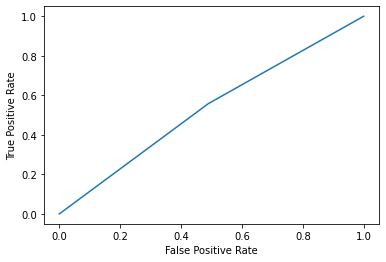

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve

print('\n ROC AUC Score', roc_auc_score(Y_test, pred_Y))

fpr, tpr, _ = metrics.roc_curve(Y_test, pred_Y)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes Algorithm



In [19]:
from sklearn.naive_bayes import GaussianNB

NaiveBayesClf = GaussianNB().fit(X_train, Y_train)

In [23]:
pred_Y = NaiveBayesClf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#accuracy_score = accuracy_score(Y_test, pred_Y) 
#print (accuracy_score)

print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


 accuracy 0.5355555555555556

 precision 0.5194543828264758

 recall (sensitivity) 0.7493548387096775

 f1 0.6135763338615954



 ROC AUC Score 0.5388961693548387


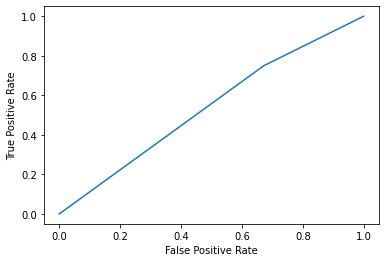

In [26]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve

print('\n ROC AUC Score', roc_auc_score(Y_test, pred_Y))

fpr, tpr, _ = metrics.roc_curve(Y_test, pred_Y)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## References

[1]. Nettleton, D. (2014). Selection of Variables and Factor Derivation. In Commercial Data Mining Processing, analysis and modeling for Predictive Analytics Projects. essay, Elsevier. 

[2]. Brownlee, J. (2020, August 27). How to use StandardScaler and MinMaxScaler transforms in Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/. 

[3]. Sklearn.preprocessing.LabelEncoder. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 

[4]. Brownlee, J. (2020, August 26). Train-test split for Evaluating Machine Learning Algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/. 

[5]. 1.10.1. Classification. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/tree.html#classification. 

[6]. Understanding the decision tree structure. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py. 


[7]. Normalized Nerd. (2021, January 13). Decision tree classification clearly explained! YouTube. Retrieved from https://www.youtube.com/watch?v=ZVR2Way4nwQ. 

[8]. Feature Selection Techniques in Machine Learning,JavatPoint. Retrieved from https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

[9]. Ciortan, M. (2019, July 26), Overview of feature selection methods. Towards Data Science. Retrieved from https://towardsdatascience.com/overview-of-feature-selection-methods-a2d115c7a8f7